### Big O Notation

Compute scientists have `borrowed` the concept from mathematics.  
This way we have a `consistent` language around efficiency of algorithms.  
Big O is focusing on the number of steps, but in a `specific` way.

### Linear Search / O(n)

Linear search will take as many `steps` as the number of elements in the array.

In [104]:
def linear_search(arr, x):
    steps = 0
    for i in range(len(arr)):
        steps += 1
        if x == arr[i]:
            return i, steps 
    return -1, steps

data = ['apples', 'bananas', 'oranges']
key, steps = linear_search(data, 'oranges')

print('Found at index =', key)
print('N =', len(data))
print('Steps =', steps)

Found at index = 2
N = 3
Steps = 3


### Binary Search / O(log n)

For n elements the algorithm increases one step each time the data is `doubled`.

In [105]:
def binary_seach(arr, x):
    left = 0
    right = len(arr) - 1

    steps = 0
    while True:
        
        steps += 1
        m = (left + right) // 2

        if x == arr[m]: 
            return m, steps

        if x > arr[m]: left = m + 1
        if x < arr[m]: right = m - 1

        if left > right:
            return -1, steps

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
key, steps = binary_seach(data, 7)
print("Steps =", steps)

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
key, steps = binary_seach(data, 17)
print("Steps =", steps)

Steps = 4
Steps = 5


### Linear vs Logarithmic

We can make a `graph` in order to campare the performance between the two algorithms.

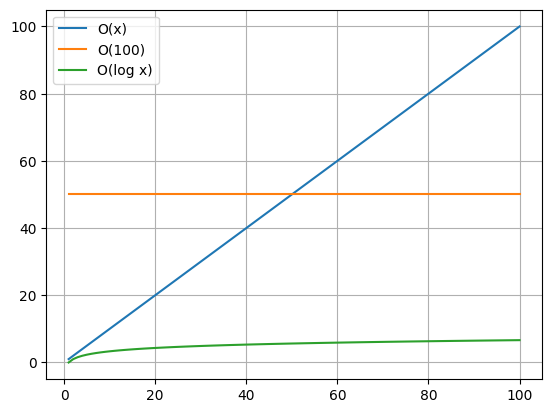

n 	 O(n) 	 O(log n)
8 	 8 	 3.0
16 	 16 	 4.0
32 	 32 	 5.0
64 	 64 	 6.0
128 	 128 	 7.0
256 	 256 	 8.0
512 	 512 	 9.0
1024 	 1024 	 10.0


In [106]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate x values
X = np.linspace(1, 100, 100)

# Generate y values
Y1 = [x for x in X]                 # linear time
Y2 = [50 for x in X]               # constant time
Y3 = [math.log(x, 2) for x in X]    # log time

# Plot the graph
plt.plot(X, Y1, label='O(x)')
plt.plot(X, Y2, label='O(100)')
plt.plot(X, Y3, label='O(log x)')
plt.legend()
plt.grid()
plt.show()

# Striking difference between O(n) and O(log n)
print("n \t O(n) \t O(log n)")
for i in range(3, 11):
    n = 2**i
    print(n, '\t', n, '\t', math.log(n, 2))

### Bubble Sort

The algorithm keep track of the `rightmost` index of the array that has not yet been sorted.  
It contains `two kinds` of steps, comparisions and swaps.  

In [107]:
def bubble_sort(arr):
    right = len(arr) - 1
    sorted = False
    steps = 0

    while not sorted:
        sorted = True
        
        for i in range(right):
            steps += 1

            if arr[i] > arr[i+1]:
                arr[i], arr[i+1] = arr[i+1], arr[i]
                steps += 1
                
                sorted = False
        right -= 1
    return arr, steps

data = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
data, steps = bubble_sort(data)

print(data)
print("Steps =", steps)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Steps = 90


### Bubble Sort / O(n^2)

For `worst-case scenario`, array sorted in descending order, we need a swap for each comparitions.  
As the number increases, the number of steps grows `exponentialy` O(n^2).

In [108]:
print("n \t Bubble sort steps \t n^2")

for n in [5, 10, 20, 40, 80]:
    arr = [i for i in range(n, 0, -1)]

    _, steps = bubble_sort(arr)
    print(n, '\t', steps, '\t\t\t', n**2)

n 	 Bubble sort steps 	 n^2
5 	 20 			 25
10 	 90 			 100
20 	 380 			 400
40 	 1560 			 1600
80 	 6320 			 6400


### Linear vs Exponential 

We can make a `graph` in order to campare the performance of an O(n^2) algorithm.

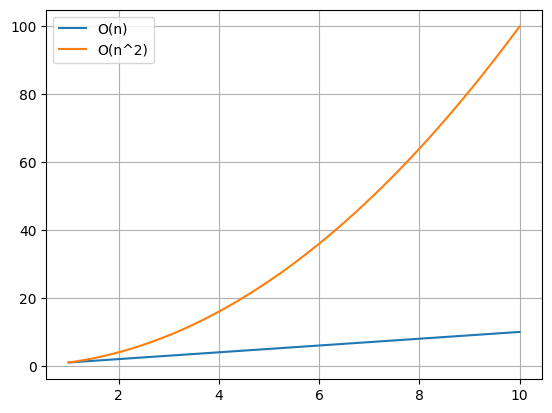

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate x values
X = np.linspace(1, 10)

# Generate y values
Y1 = [x for x in X]     # linear time
Y2 = [x**2 for x in X]  # quadratic time

# Plot the graph
plt.plot(X, Y1, label='O(n)')
plt.plot(X, Y2, label='O(n^2)')
plt.legend()
plt.grid()
plt.show()

### Optimize Exponential / O(n)

Here is an example of how we can replace a slow O(n^2) algorithm with `O(n)`.  
we are using `indexes` in a track number array to remember so far seen numbers.

In [110]:
# O(n^2)
def has_duplicates(arr):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if i != j and arr[i] == arr[j]:
                return True
    return False

# O(n)
def has_duplicates_v2(arr):

    # Initialize tmp with zeros up to the maximum value in arr
    tmp = [0] * (max(arr) + 1)

    for i in range(len(arr)-1):
        if tmp[arr[i]] == 1:
            return True
        tmp[arr[i]] = 1 # Look Here
    return False

data = [1, 5, 3, 9, 1, 4]
print("Duplicates =", has_duplicates(data))
print("Duplicates =", has_duplicates_v2(data))


Duplicates = True
Duplicates = True


### Selection Sort

to do